# Final Project

### Introduction
I was looking at datasets that had implications that I could relate to and I came upon this dataset on kaggle. It immediately intrigued me because I have seen housing prices increase by a lot since I was born, with prices of houses doubling or tripling in the area that I lived in Los Angeles County. The question then dawned upon me. Can I use a model to predict the prices of houses in California based on some features that were given in this dataset?

### Dataset
I found a dataset on real estate prices in California for the first 6 months of 2021 on kaggle with 31238 unique values. There are 39 columns which gives varying information from location of the property to type of property.

Link: https://www.kaggle.com/yellowj4acket/real-estate-california

### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#import dataset
csv = 'Real_Estate_California.csv'
real_est = pd.read_csv(csv)
real_est.head()

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


In [3]:
real_est.columns

Index(['Unnamed: 0', 'id', 'stateId', 'countyId', 'cityId', 'country',
       'datePostedString', 'is_bankOwned', 'is_forAuction', 'event', 'time',
       'price', 'pricePerSquareFoot', 'city', 'state', 'yearBuilt',
       'streetAddress', 'zipcode', 'longitude', 'latitude', 'hasBadGeocode',
       'description', 'currency', 'livingArea', 'livingAreaValue',
       'lotAreaUnits', 'bathrooms', 'bedrooms', 'buildingArea', 'parking',
       'garageSpaces', 'hasGarage', 'levels', 'pool', 'spa',
       'isNewConstruction', 'hasPetsAllowed', 'homeType', 'county'],
      dtype='object')

In [4]:
#removing unnecessary columns
real_est.drop(columns = ['Unnamed: 0', 'id', 'stateId', 'countyId', 'cityId', 'country', 'longitude', 'latitude', 'currency', 'time'],
              inplace = True)
real_est.head()

,datePostedString,is_bankOwned,is_forAuction,event,price,pricePerSquareFoot,city,state,yearBuilt,streetAddress,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,2021-01-13,0,0,Listed for sale,145000.0,0.0,Gold Run,CA,0,0 Moody Ridge Rd,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,2021-07-12,0,0,Listed for sale,675000.0,404.0,Pinole,CA,1958,1476 Belden Ct,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2021-07-08,0,0,Listed for sale,649000.0,459.0,Pinole,CA,1959,3540 Savage Ave,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,2021-07-07,0,0,Listed for sale,599000.0,448.0,Pinole,CA,1908,2391 Plum St,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,2021-07-07,0,0,Listed for sale,299000.0,0.0,Pinole,CA,0,2693 Appian Way,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


<AxesSubplot:xlabel='price', ylabel='Count'>

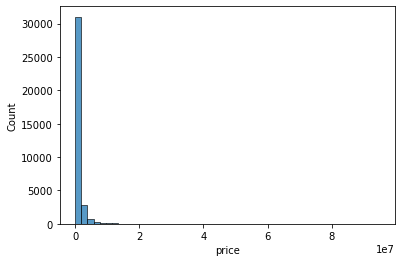

In [5]:
sns.histplot(data = real_est, x = 'price', bins = 50)

In [6]:
real_est['price'].describe()

count    3.538900e+04
mean     1.187889e+06
std      2.564884e+06
min      0.000000e+00
25%      3.999000e+05
50%      6.990000e+05
75%      1.199888e+06
max      9.500000e+07
Name: price, dtype: float64

In [7]:
county= real_est['county'].value_counts()
county

Los Angeles County        7741
San Diego County          2764
Orange County             2265
San Bernardino County     2083
Riverside County          1869
Santa Clara County        1447
Sacramento County         1182
Alameda County            1151
Kern County                960
Contra Costa County        917
Fresno County              787
San Francisco County       748
Sonoma County              721
Ventura County             673
San Mateo County           644
San Joaquin County         589
Placer County              531
San Luis Obispo County     524
Santa Barbara County       470
Marin County               431
Tulare County              374
Stanislaus County          371
El Dorado County           368
Monterey County            357
Shasta County              353
Butte County               307
Santa Cruz County          299
Calaveras County           286
Humboldt County            273
Lake County                268
Solano County              263
Mendocino County           246
Merced C

In [8]:
counties = county.index

In [9]:
j = 0
county_ohe = {}
for i in counties:
    county_ohe[i] = j
    j+= 1

In [10]:
def c_ohe(col):
    return county_ohe[col]

In [11]:
real_est['county_ohe'] = real_est['county'].apply(c_ohe)
real_est['county_ohe']

0        16
1         9
2         9
3         9
4         9
         ..
35384     0
35385     0
35386    26
35387    26
35388    26
Name: county_ohe, Length: 35389, dtype: int64

In [12]:
real_est['homeType'].value_counts()

SINGLE_FAMILY    22409
LOT               5850
CONDO             3495
MULTI_FAMILY      2446
TOWNHOUSE         1188
APARTMENT            1
Name: homeType, dtype: int64

In [13]:
def ohe_ht(col):
    if col == 'SINGLE_FAMILY':
        return 0
    elif  col == 'LOT':
        return 1
    elif col == 'CONDO':
        return 2
    elif col == 'MULTI_FAMILY':
        return 3
    elif col == 'TOWNHOUSE':
        return 4
    else:
        return 5

In [14]:
real_est['homeType_ohe'] = real_est['homeType'].apply(ohe_ht)

In [15]:
real_est['yearBuilt'].describe()

count    35389.000000
mean      1637.428664
std        746.333162
min          0.000000
25%       1929.000000
50%       1964.000000
75%       1989.000000
max       9999.000000
Name: yearBuilt, dtype: float64

In [16]:
real_est[real_est['yearBuilt'] == 9999]

,datePostedString,is_bankOwned,is_forAuction,event,price,pricePerSquareFoot,city,state,yearBuilt,streetAddress,...,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,county_ohe,homeType_ohe
5119,2021-03-01,0,0,Price change,1100000.0,0.0,San Francisco,CA,9999,1748 La Salle Ave,...,1,0,0,0,0,0,MULTI_FAMILY,San Francisco County,11,3
19941,2021-03-02,0,0,Listed for sale,602100.0,602100.0,Tulelake,CA,9999,5427 E County Road 104,...,0,One,0,0,0,0,SINGLE_FAMILY,Modoc County,50,0
19942,2021-03-02,0,0,Listed for sale,604485.0,0.0,Tulelake,CA,9999,0 County Road 107a,...,0,One,0,0,0,0,SINGLE_FAMILY,Modoc County,50,0
31010,2021-03-01,0,0,Price change,1100000.0,0.0,San Francisco,CA,9999,1748 La Salle Ave,...,1,0,0,0,0,0,MULTI_FAMILY,San Francisco County,11,3


In [17]:
sum(real_est['yearBuilt'] == 0)

6015

In [18]:
real_est[real_est['yearBuilt'] == 0]['homeType'].value_counts()

LOT              5631
SINGLE_FAMILY     291
MULTI_FAMILY       49
CONDO              37
TOWNHOUSE           7
Name: homeType, dtype: int64

In [19]:
real_est[real_est['yearBuilt'] == 0]['isNewConstruction'].value_counts()

0    5979
1      36
Name: isNewConstruction, dtype: int64

Since most lots have their year built listed as 0 and we are more interested in housinng prices, we are going to remove the lots.

In [20]:
no_lot = ['SINGLE_FAMILY', 'MULTI_FAMILY', 'CONDO', 'TOWNHOUSE', 'APARTMENT']
lotless= real_est[real_est['homeType'].isin(no_lot)]
lotless.head()

,datePostedString,is_bankOwned,is_forAuction,event,price,pricePerSquareFoot,city,state,yearBuilt,streetAddress,...,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,county_ohe,homeType_ohe
1,2021-07-12,0,0,Listed for sale,675000.0,404.0,Pinole,CA,1958,1476 Belden Ct,...,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0
2,2021-07-08,0,0,Listed for sale,649000.0,459.0,Pinole,CA,1959,3540 Savage Ave,...,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0
3,2021-07-07,0,0,Listed for sale,599000.0,448.0,Pinole,CA,1908,2391 Plum St,...,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County,9,0
5,2021-07-06,0,0,Listed for sale,575000.0,407.0,Pinole,CA,1958,2611 Doidge Ave,...,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0
6,2021-07-05,0,0,Listed for sale,888000.0,390.0,Pinole,CA,2000,645 Carlotta Cir,...,1,Two Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0


<AxesSubplot:xlabel='yearBuilt', ylabel='Count'>

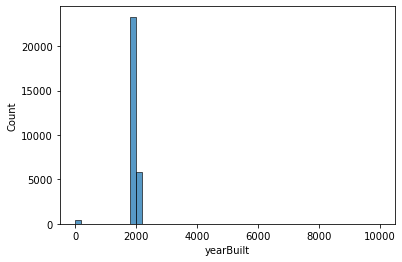

In [21]:
sns.histplot(data = lotless, x = 'yearBuilt', bins = 50)

In [22]:
lotless['city'].value_counts()

Los Angeles          1563
San Diego            1006
San Francisco         734
Sacramento            679
San Jose              657
                     ... 
Lytle Creek             1
Richvale                1
Santa Rosa Valley       1
Firebaugh               1
Heber                   1
Name: city, Length: 1091, dtype: int64

In [23]:
lotless['is_bankOwned'].value_counts()

0    29536
1        3
Name: is_bankOwned, dtype: int64

In [24]:
major_cities = ['Los Angeles', 'San Diego', 'San Francisco', 'San Jose', 'Sacramento']
lotless['large_cities'] = lotless['city'].isin(major_cities)
lotless.head()

C:\Users\Justin Chu\AppData\Local\Temp/ipykernel_39800/4037353043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lotless['large_cities'] = lotless['city'].isin(major_cities)


,datePostedString,is_bankOwned,is_forAuction,event,price,pricePerSquareFoot,city,state,yearBuilt,streetAddress,...,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,county_ohe,homeType_ohe,large_cities
1,2021-07-12,0,0,Listed for sale,675000.0,404.0,Pinole,CA,1958,1476 Belden Ct,...,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False
2,2021-07-08,0,0,Listed for sale,649000.0,459.0,Pinole,CA,1959,3540 Savage Ave,...,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False
3,2021-07-07,0,0,Listed for sale,599000.0,448.0,Pinole,CA,1908,2391 Plum St,...,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False
5,2021-07-06,0,0,Listed for sale,575000.0,407.0,Pinole,CA,1958,2611 Doidge Ave,...,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False
6,2021-07-05,0,0,Listed for sale,888000.0,390.0,Pinole,CA,2000,645 Carlotta Cir,...,Two Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False


In [25]:
lotless['isNewConstruction'].value_counts()

0    29058
1      481
Name: isNewConstruction, dtype: int64

In [26]:
lotless['event'].value_counts()

Listed for sale    21374
Price change        4049
Listing removed     2698
Sold                1135
None                 277
Listed for rent        5
Pending sale           1
Name: event, dtype: int64

We want to get all of the sales of houses so it only accounts for the sale price of houses. We also want to get rid of all of the values where the year is not a plausible year (i.e. 9999 or 0).

In [27]:
for_sale = lotless[lotless['event'].isin(['Listed for sale', 'Sold', 'Pending sale'])]
for_sale = for_sale[(for_sale['yearBuilt'] > 1500) & (for_sale['yearBuilt'] < 2022)]
for_sale.head()

,datePostedString,is_bankOwned,is_forAuction,event,price,pricePerSquareFoot,city,state,yearBuilt,streetAddress,...,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,county_ohe,homeType_ohe,large_cities
1,2021-07-12,0,0,Listed for sale,675000.0,404.0,Pinole,CA,1958,1476 Belden Ct,...,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False
2,2021-07-08,0,0,Listed for sale,649000.0,459.0,Pinole,CA,1959,3540 Savage Ave,...,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False
3,2021-07-07,0,0,Listed for sale,599000.0,448.0,Pinole,CA,1908,2391 Plum St,...,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False
5,2021-07-06,0,0,Listed for sale,575000.0,407.0,Pinole,CA,1958,2611 Doidge Ave,...,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False
6,2021-07-05,0,0,Listed for sale,888000.0,390.0,Pinole,CA,2000,645 Carlotta Cir,...,Two Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False


In [28]:
for_sale['pool'].value_counts()

0    19094
1     3121
Name: pool, dtype: int64

In [29]:
for_sale['livingArea']

1        1671.0
2        1414.0
3        1336.0
5        1413.0
6        2278.0
          ...  
35382       0.0
35383       0.0
35386     486.0
35387    1896.0
35388    1801.0
Name: livingArea, Length: 22215, dtype: float64

In [30]:
for_sale['lotAreaUnits'].value_counts()

sqft     16030
Acres     6185
Name: lotAreaUnits, dtype: int64

In [31]:
for_sale.columns

Index(['datePostedString', 'is_bankOwned', 'is_forAuction', 'event', 'price',
       'pricePerSquareFoot', 'city', 'state', 'yearBuilt', 'streetAddress',
       'zipcode', 'hasBadGeocode', 'description', 'livingArea',
       'livingAreaValue', 'lotAreaUnits', 'bathrooms', 'bedrooms',
       'buildingArea', 'parking', 'garageSpaces', 'hasGarage', 'levels',
       'pool', 'spa', 'isNewConstruction', 'hasPetsAllowed', 'homeType',
       'county', 'county_ohe', 'homeType_ohe', 'large_cities'],
      dtype='object')

Since there are quite a few houses that have their square footage labeled at quite a low number (i.e. 0 or 1) we want to remove those to clean up the data a bit.

In [32]:
for_sale = for_sale[for_sale['livingArea'] > 100]
for_sale.head()

,datePostedString,is_bankOwned,is_forAuction,event,price,pricePerSquareFoot,city,state,yearBuilt,streetAddress,...,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,county_ohe,homeType_ohe,large_cities
1,2021-07-12,0,0,Listed for sale,675000.0,404.0,Pinole,CA,1958,1476 Belden Ct,...,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False
2,2021-07-08,0,0,Listed for sale,649000.0,459.0,Pinole,CA,1959,3540 Savage Ave,...,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False
3,2021-07-07,0,0,Listed for sale,599000.0,448.0,Pinole,CA,1908,2391 Plum St,...,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False
5,2021-07-06,0,0,Listed for sale,575000.0,407.0,Pinole,CA,1958,2611 Doidge Ave,...,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False
6,2021-07-05,0,0,Listed for sale,888000.0,390.0,Pinole,CA,2000,645 Carlotta Cir,...,Two Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,9,0,False


In [33]:
for_sale['bathrooms'].value_counts()

2.0     8488
3.0     6476
1.0     2781
4.0     1611
0.0     1005
5.0      647
6.0      292
7.0      127
8.0       90
9.0       31
10.0      15
11.0      14
12.0       7
14.0       6
15.0       3
13.0       2
16.0       2
28.0       1
48.0       1
25.0       1
23.0       1
Name: bathrooms, dtype: int64

In [34]:
for_sale['bedrooms'].value_counts()

3.0     8379
4.0     5499
2.0     3924
5.0     1770
0.0      700
1.0      628
6.0      406
7.0      128
8.0       86
9.0       29
11.0      14
12.0      13
10.0       8
13.0       4
17.0       2
32.0       2
18.0       2
82.0       1
15.0       1
50.0       1
21.0       1
80.0       1
14.0       1
56.0       1
Name: bedrooms, dtype: int64

<AxesSubplot:xlabel='homeType', ylabel='Count'>

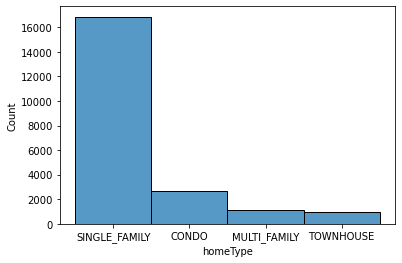

In [35]:
sns.histplot(data = for_sale, x = 'homeType')

<AxesSubplot:xlabel='price', ylabel='Count'>

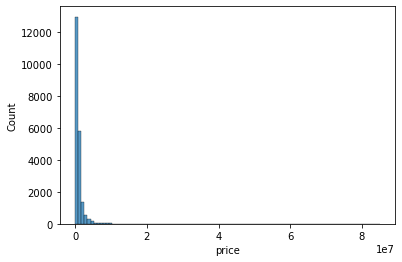

In [36]:
sns.histplot(data= for_sale, x = 'price', bins = 100)

### Predictive Task and Model
I have a few baselines for this by using Linear Regression, Naive Bayes and Support Vector Machine with the model being a decision tree. I think that the decision tree should do the best because I feel it would be able to better cover all of the inputs I am adding. I am using mean absolute error as the metric to determine how well the model did because it seems to work well for regression models. 

In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:
from sklearn.model_selection import train_test_split
X = for_sale[['large_cities', 'yearBuilt', 'homeType_ohe', 'isNewConstruction', 'livingArea', 'pool', 'bedrooms', 'bathrooms']]
y = for_sale['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

In [40]:
mean_absolute_error(y_test, pred)

589643.1663394197

In [41]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)
pred = svm.predict(X_test)

In [42]:
mean_absolute_error(y_test, pred)

655780.1080130442

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)

In [44]:
mean_absolute_error(y_test, pred)

764618.0499907425

In [45]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

In [46]:
mean_absolute_error(y_test, pred)

585108.7228291057

### Results
As we can see above, the models actually don't seem to do quite well but the decision tree regressor does the best out of all of the models. I think overall, the dataset does not have enough proper information to be able to properly predict the prices of housing in California. There are often a lot of other circumstances that increase or decrease the value of property, such as school district, accessibility to transportation (i.e. public transport, freeways/highways), and quality of the house. I know this from first hand experience as the neighborhood I used to live in had housing prices skyrocket because the school district had a notoriously good reputation. Even within the city, there were certain parts of it with housing prices that were a lot lower because it was very far from the main part of the town (i.e. the school, restaurants, etc.) and even though the size of the houses were comparable, the prices were quite a bit lower. I think that the feature that I had added were important for many people when it comes to buying houses but the dataset did not have enough information for me to create a better model. I think there was also a huge problem with the dataset because there are a lot of feature that were important that had mistakes in them, meaning even though I cut out the 0 square feet houses, there could be other incorrect numbers which would lead to incorrect predictions on the model. I think what we can gather from this is that the prediction models can have bad numbers when it comes to evalutaion time but it doesn't mean that it is necessarily a problem with the model. As we can see, there are a lot of external circumstances and issues with the dataset that could cause the model to not come out as well as we hoped.